# Reducing Household Energy Consumption

## Introduction

In an era marked by the growth of technology and increasing energy demands, understanding and optimizing household power consumption has become imperative. The advent of smart meters and the availability of large-scale datasets offer a unique opportunity to delve into the realm of data science to gain insights into electricity usage patterns. This project aims to leverage the power of data to reduce household energy consumption by unraveling its complexities through comprehensive data analysis.

## Data Set Information:

This archive contains 2075259 measurements gathered between December 2006 and November 2010 (47 months).
Notes:
1. (global_active_power*1000/60 - sub_metering_1 - sub_metering_2 - sub_metering_3) represents the active energy consumed every minute (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3.

2. The dataset contains some missing values in the measurements (nearly 1,25% of the rows). All calendar timestamps are present in the dataset but for some timestamps, the measurement values are missing: a missing value is represented by the absence of value between two consecutive semi-colon attribute separators. For instance, the dataset shows missing values on April 28, 2007.

## Attribute Information:
1. date: Date in format dd/mm/yyyy

2. time: time in format hh:mm:ss

3. global_active_power: household global minute-averaged active power (in kilowatt)

4. global_reactive_power: household global minute-averaged reactive power (in kilowatt)

5. voltage: minute-averaged voltage (in volt)

6. global_intensity: household global minute-averaged current intensity (in ampere)

7. sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).

8. sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.

9. sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

## Load the data

In [2]:
df = pd.read_csv('household_power_consumption.txt',sep = ';',
                parse_dates={'dt':['Date','Time']},
                infer_datetime_format=True,
                low_memory=False, na_values=['nan','?'],
                index_col='dt')

/var/folders/25/py38ks495xd785syg74nqh1h0000gn/T/ipykernel_855/3142664557.py:1: FutureWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

/var/folders/25/py38ks495xd785syg74nqh1h0000gn/T/ipykernel_855/3142664557.py:1: UserWarning:

Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



In [3]:
df= df.reset_index()

## Exploratory Data Analysis

In [4]:
df.head()

dt  Global_active_power  Global_reactive_power  Voltage  \
0 2006-12-16 17:24:00                4.216                  0.418   234.84   
1 2006-12-16 17:25:00                5.360                  0.436   233.63   
2 2006-12-16 17:26:00                5.374                  0.498   233.29   
3 2006-12-16 17:27:00                5.388                  0.502   233.74   
4 2006-12-16 17:28:00                3.666                  0.528   235.68   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
0              18.4             0.0             1.0            17.0  
1              23.0             0.0             1.0            16.0  
2              23.0             0.0             2.0            17.0  
3              23.0             0.0             1.0            17.0  
4              15.8             0.0             1.0            17.0

In [5]:
import ydata_profiling
from pandas_profiling import ProfileReport

/var/folders/25/py38ks495xd785syg74nqh1h0000gn/T/ipykernel_855/3320131497.py:2: DeprecationWarning:

`import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.



In [6]:
report = ProfileReport
report(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

The dataset comprises one datetime variable and seven numeric variables. The missing values account for 1.1% of the dataset, and there are no duplicated rows present.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   dt                     datetime64[ns]
 1   Global_active_power    float64       
 2   Global_reactive_power  float64       
 3   Voltage                float64       
 4   Global_intensity       float64       
 5   Sub_metering_1         float64       
 6   Sub_metering_2         float64       
 7   Sub_metering_3         float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 126.7 MB


In [8]:
# Visual Python: Data Analysis > Frame
df['dt'] = pd.to_datetime(df['dt'])
df

dt  Global_active_power  Global_reactive_power  \
0       2006-12-16 17:24:00                4.216                  0.418   
1       2006-12-16 17:25:00                5.360                  0.436   
2       2006-12-16 17:26:00                5.374                  0.498   
3       2006-12-16 17:27:00                5.388                  0.502   
4       2006-12-16 17:28:00                3.666                  0.528   
...                     ...                  ...                    ...   
2075254 2010-11-26 20:58:00                0.946                  0.000   
2075255 2010-11-26 20:59:00                0.944                  0.000   
2075256 2010-11-26 21:00:00                0.938                  0.000   
2075257 2010-11-26 21:01:00                0.934                  0.000   
2075258 2010-11-26 21:02:00                0.932                  0.000   

         Voltage  Global_intensity  Sub_metering_1  Sub_metering_2  \
0         234.84              18.4             0.0             1.0   
1         233.63              23.0             0.0             1.0   
2         233.29              23.0             0.0             2.0   
3         233.74              23.0             0.0             1.0   
4         235.68              15.8             0.0             1.0   
...          ...               ...             ...             ...   
2075254   240.43               4.0             0.0             0.0   
2075255   240.00               4.0             0.0             0.0   
2075256   239.82               3.8             0.0             0.0   
2075257   239.70               3.8             0.0             0.0   
2075258   239.55               3.8             0.0             0.0   

         Sub_metering_3  
0                  17.0  
1                  16.0  
2                  17.0  
3                  17.0  
4                  17.0  
...                 ...  
2075254             0.0  
2075255             0.0  
2075256             0.0  
2075257             0.0  
2075258             0.0  

[2075259 rows x 8 columns]

In [9]:
df.to_csv('dataset.csv', index=False)

In [22]:
df.describe()

Global_active_power  Global_reactive_power       Voltage  \
count         2.049280e+06           2.049280e+06  2.049280e+06   
mean          1.091615e+00           1.237145e-01  2.408399e+02   
std           1.057294e+00           1.127220e-01  3.239987e+00   
min           7.600000e-02           0.000000e+00  2.232000e+02   
25%           3.080000e-01           4.800000e-02  2.389900e+02   
50%           6.020000e-01           1.000000e-01  2.410100e+02   
75%           1.528000e+00           1.940000e-01  2.428900e+02   
max           1.112200e+01           1.390000e+00  2.541500e+02   

       Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
count      2.049280e+06    2.049280e+06    2.049280e+06    2.049280e+06  
mean       4.627759e+00    1.121923e+00    1.298520e+00    6.458447e+00  
std        4.444396e+00    6.153031e+00    5.822026e+00    8.437154e+00  
min        2.000000e-01    0.000000e+00    0.000000e+00    0.000000e+00  
25%        1.400000e+00    0.000000e+00    0.000000e+00    0.000000e+00  
50%        2.600000e+00    0.000000e+00    0.000000e+00    1.000000e+00  
75%        6.400000e+00    0.000000e+00    1.000000e+00    1.700000e+01  
max        4.840000e+01    8.800000e+01    8.000000e+01    3.100000e+01

In [10]:
df.isnull().sum()

dt                           0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [11]:
baris_null = df[df.isnull().any(axis=1)]
baris_null

dt  Global_active_power  Global_reactive_power  \
6839    2006-12-21 11:23:00                  NaN                    NaN   
6840    2006-12-21 11:24:00                  NaN                    NaN   
19724   2006-12-30 10:08:00                  NaN                    NaN   
19725   2006-12-30 10:09:00                  NaN                    NaN   
41832   2007-01-14 18:36:00                  NaN                    NaN   
...                     ...                  ...                    ...   
1990185 2010-09-28 19:09:00                  NaN                    NaN   
1990186 2010-09-28 19:10:00                  NaN                    NaN   
1990187 2010-09-28 19:11:00                  NaN                    NaN   
1990188 2010-09-28 19:12:00                  NaN                    NaN   
2027411 2010-10-24 15:35:00                  NaN                    NaN   

         Voltage  Global_intensity  Sub_metering_1  Sub_metering_2  \
6839         NaN               NaN             NaN             NaN   
6840         NaN               NaN             NaN             NaN   
19724        NaN               NaN             NaN             NaN   
19725        NaN               NaN             NaN             NaN   
41832        NaN               NaN             NaN             NaN   
...          ...               ...             ...             ...   
1990185      NaN               NaN             NaN             NaN   
1990186      NaN               NaN             NaN             NaN   
1990187      NaN               NaN             NaN             NaN   
1990188      NaN               NaN             NaN             NaN   
2027411      NaN               NaN             NaN             NaN   

         Sub_metering_3  
6839                NaN  
6840                NaN  
19724               NaN  
19725               NaN  
41832               NaN  
...                 ...  
1990185             NaN  
1990186             NaN  
1990187             NaN  
1990188             NaN  
2027411             NaN  

[25979 rows x 8 columns]

In [12]:
df = df.dropna()

In [13]:
df.isna().sum()

dt                       0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

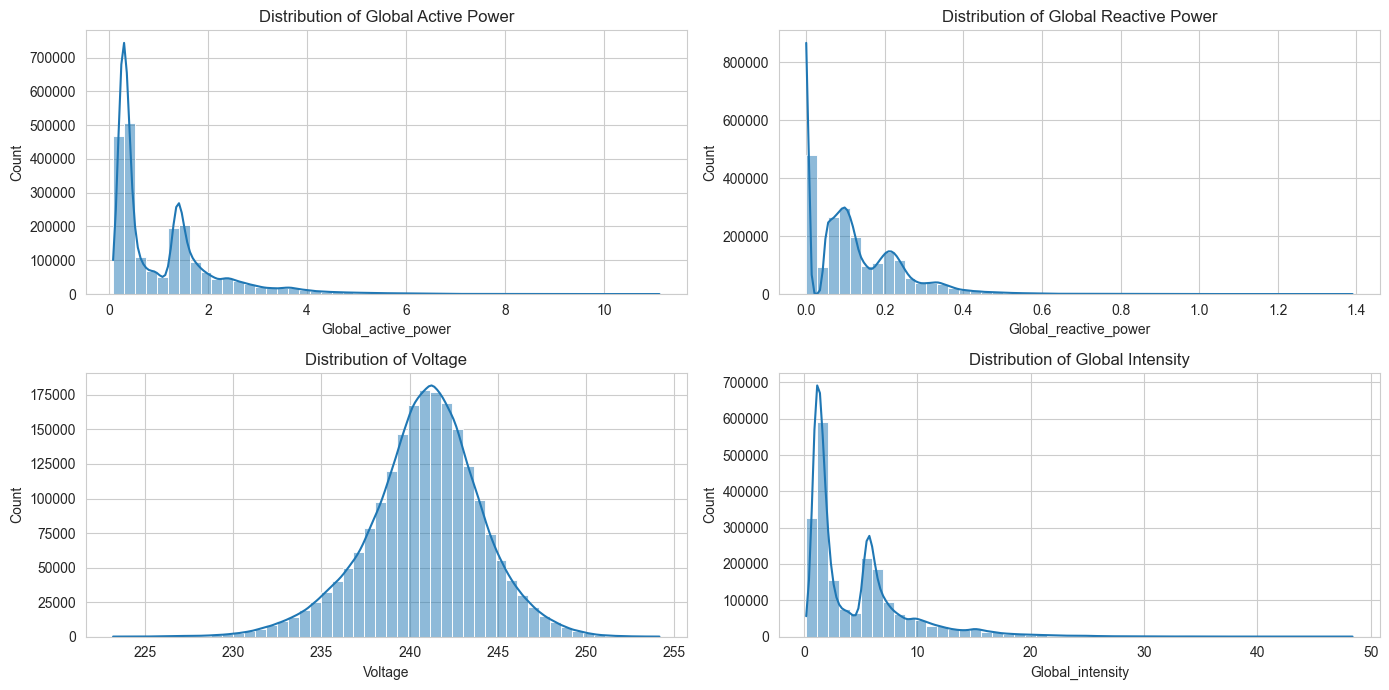

In [23]:
sns.set_style('whitegrid')

# Plot distributions of a few selected columns
plt.figure(figsize=(14, 7))

# Distribution of Global Active Power
plt.subplot(2, 2, 1)
sns.histplot(df['Global_active_power'].dropna(), bins=50, kde=True)
plt.title('Distribution of Global Active Power')

# Distribution of Global Reactive Power
plt.subplot(2, 2, 2)
sns.histplot(df['Global_reactive_power'].dropna(), bins=50, kde=True)
plt.title('Distribution of Global Reactive Power')

# Distribution of Voltage
plt.subplot(2, 2, 3)
sns.histplot(df['Voltage'].dropna(), bins=50, kde=True)
plt.title('Distribution of Voltage')

# Distribution of Global Intensity
plt.subplot(2, 2, 4)
sns.histplot(df['Global_intensity'].dropna(), bins=50, kde=True)
plt.title('Distribution of Global Intensity')

plt.tight_layout()
plt.show()

The distributions for selected features have been plotted:
* Global Active Power : The distribution appears to be right-skewed, indicating that lower values are more common, with some larger spikes occasionally.
* Global Reactive Power : This also shows a right-skewed distribution, with a concentration of values at the lower end.
* Voltage : The distribution of voltage seems to be more normally distributed, with a peak around the median value.
* Global Intensity : Similar to active and reactive power, the global intensity is right-skewed.

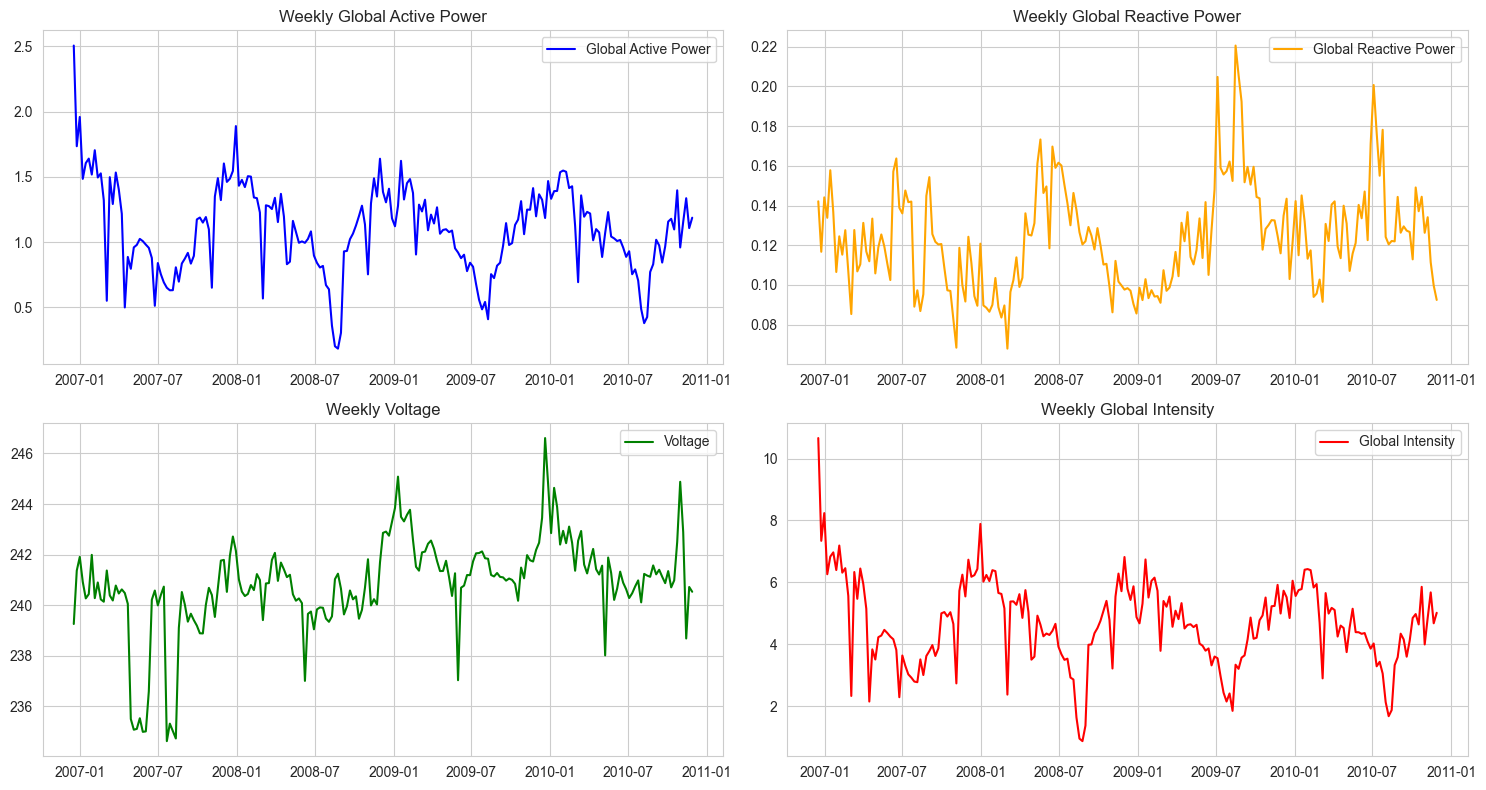

In [15]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Convert 'dt' to datetime and set it as the index
# This is necessary for time series plotting
if df['dt'].dtype == 'object':
    df['dt'] = pd.to_datetime(df['dt'])
df.set_index('dt', inplace=True)

# Resample the data to a weekly mean
weekly_data = df.resample('W').mean()

# Plotting the weekly trends of the selected features
plt.figure(figsize=(15, 8))

# Global Active Power
plt.subplot(2, 2, 1)
plt.plot(weekly_data['Global_active_power'], label='Global Active Power', color='blue')
plt.legend()
plt.title('Weekly Global Active Power')

# Global Reactive Power
plt.subplot(2, 2, 2)
plt.plot(weekly_data['Global_reactive_power'], label='Global Reactive Power', color='orange')
plt.legend()
plt.title('Weekly Global Reactive Power')

# Voltage
plt.subplot(2, 2, 3)
plt.plot(weekly_data['Voltage'], label='Voltage', color='green')
plt.legend()
plt.title('Weekly Voltage')

# Global Intensity
plt.subplot(2, 2, 4)
plt.plot(weekly_data['Global_intensity'], label='Global Intensity', color='red')
plt.legend()
plt.title('Weekly Global Intensity')

plt.tight_layout()
plt.show()

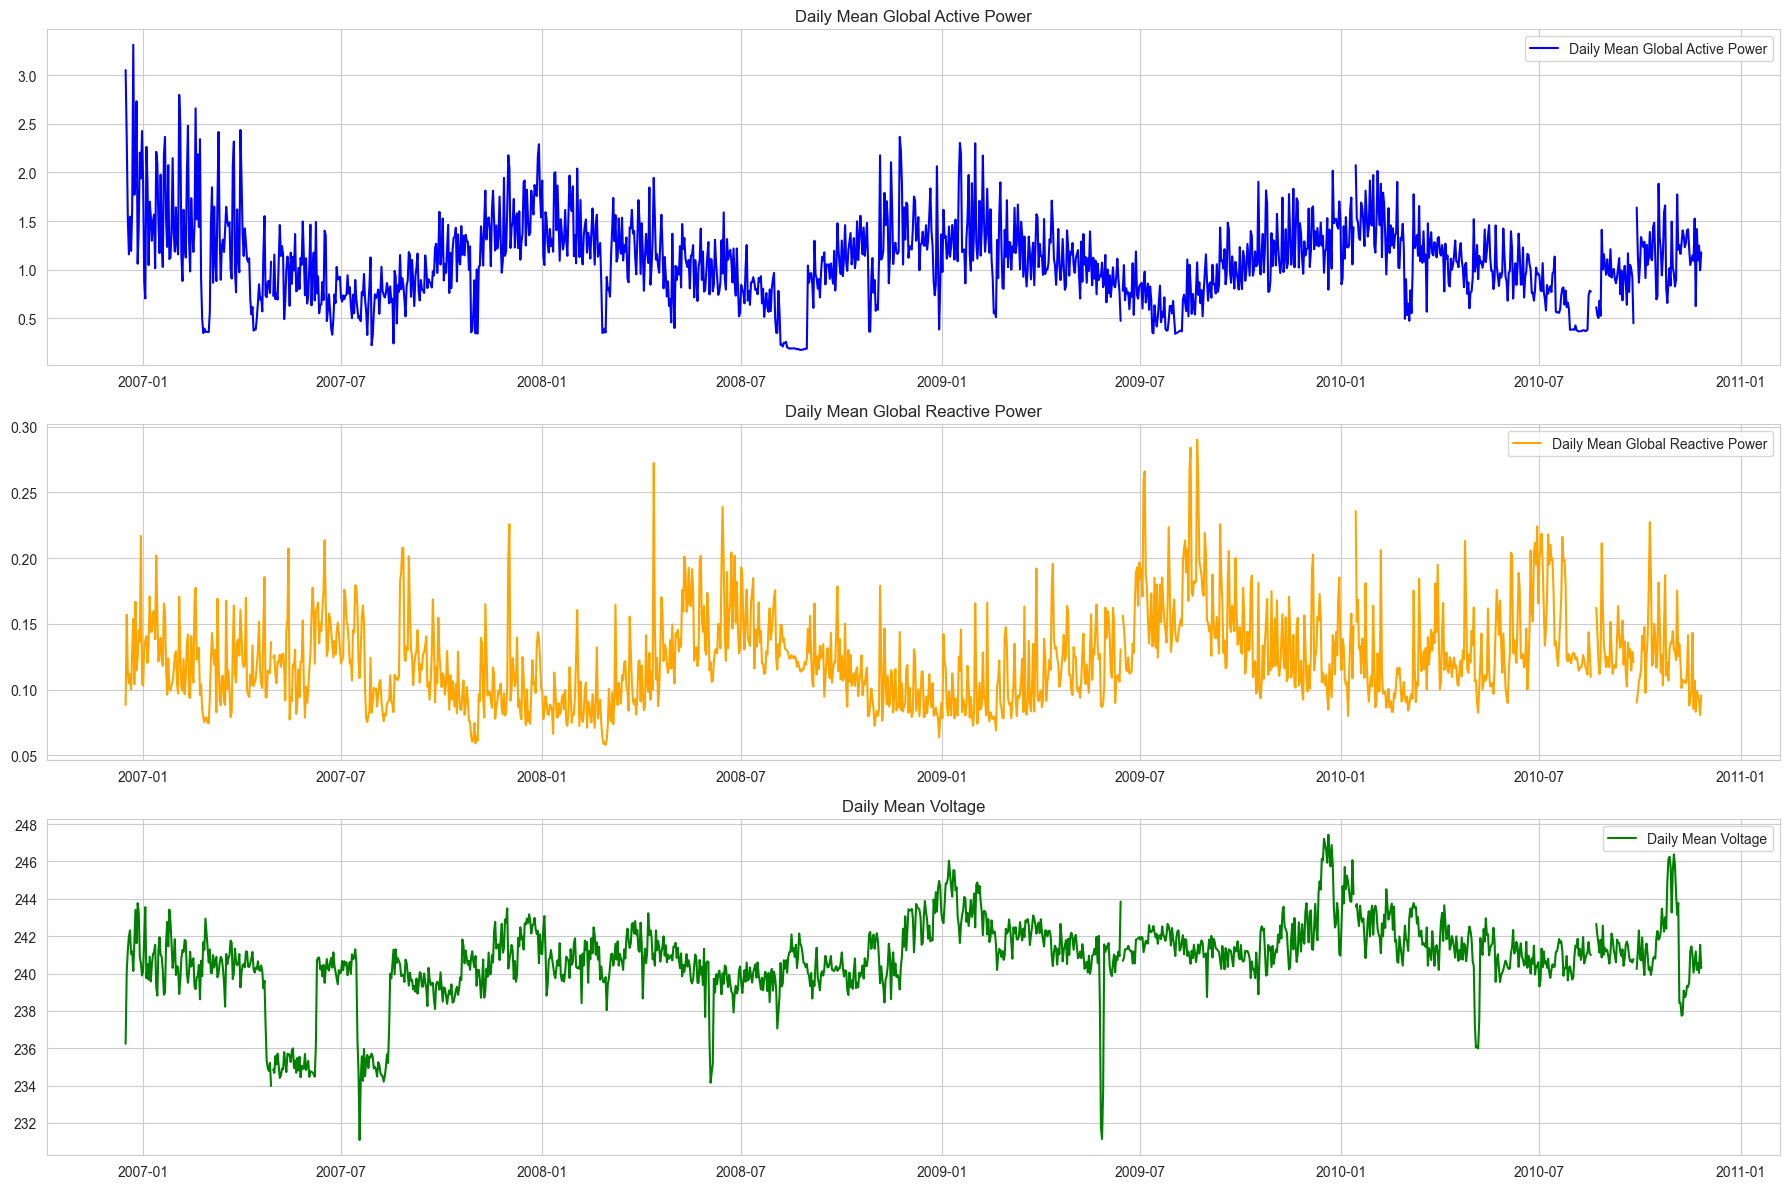

In [16]:
plt.figure(figsize=(18, 12))

# Plotting the daily mean of 'Global_active_power'
plt.subplot(3, 1, 1)
daily_data = df['Global_active_power'].resample('D').mean()
plt.plot(daily_data, label='Daily Mean Global Active Power', color='blue')
plt.title('Daily Mean Global Active Power')
plt.legend()

# Plotting the daily mean of 'Global_reactive_power'
plt.subplot(3, 1, 2)
daily_data = df['Global_reactive_power'].resample('D').mean()
plt.plot(daily_data, label='Daily Mean Global Reactive Power', color='orange')
plt.title('Daily Mean Global Reactive Power')
plt.legend()

# Plotting the daily mean of 'Voltage'
plt.subplot(3, 1, 3)
daily_data = df['Voltage'].resample('D').mean()
plt.plot(daily_data, label='Daily Mean Voltage', color='green')
plt.title('Daily Mean Voltage')
plt.legend()

plt.tight_layout()
plt.show()

* The active power consumption of the house tends to experience stable increases and decreases each year. The rises and falls may be attributed to the weather conditions in the United States, which tend to be colder in January and warmer in September. This can lead to an increase in the usage of high-power electrical appliances, such as heaters, in January, and a decrease in the usage of these electrical appliances in September.
* The reactive power consumption of the household experiences fluctuations that tend to increase each year. The increases and decreases can be attributed to the weather conditions in the United States, which tend to be warmer in June and July and colder in January and February. This can lead to an increase in the usage of electrical appliances that require reactive power, such as air conditioners and electric motors, in June and July, and a decrease in the usage of these electrical appliances in January and February.

/var/folders/25/py38ks495xd785syg74nqh1h0000gn/T/ipykernel_855/4162189970.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



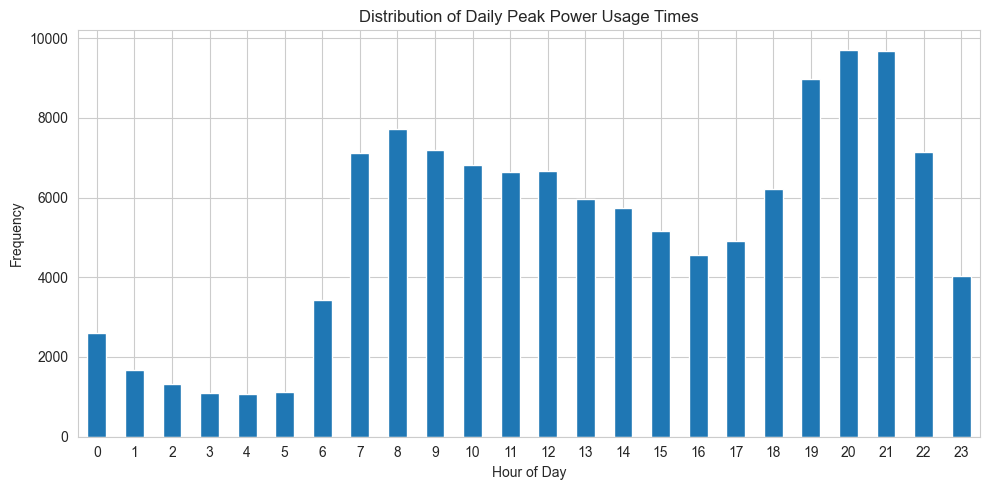

Most common hours for peak power usage: [20, 21, 19]


In [17]:
import pandas as pd


df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
non_na_data = df.dropna(subset=['Global_active_power'])


daily_peak = non_na_data['Global_active_power'].resample('D').max()
daily_peak_times = non_na_data.loc[non_na_data['Global_active_power'].isin(daily_peak)].index

peak_counts = daily_peak_times.hour.value_counts().sort_index()

plt.figure(figsize=(10, 5))
peak_counts.plot(kind='bar')
plt.title('Distribution of Daily Peak Power Usage Times')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

common_peak_hours = peak_counts.nlargest(3).index.tolist()
print('Most common hours for peak power usage:', common_peak_hours)

The most common hours for peak power usage are 20:00, 21:00, and 19:00. This information can be used to suggest shifting non-essential operations to off-peak hours to optimize power usage. Additionally, it may be beneficial to implement energy-efficient equipment and renewable energy sources to reduce reliance on the grid during these peak hours.


/var/folders/25/py38ks495xd785syg74nqh1h0000gn/T/ipykernel_855/1404280776.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



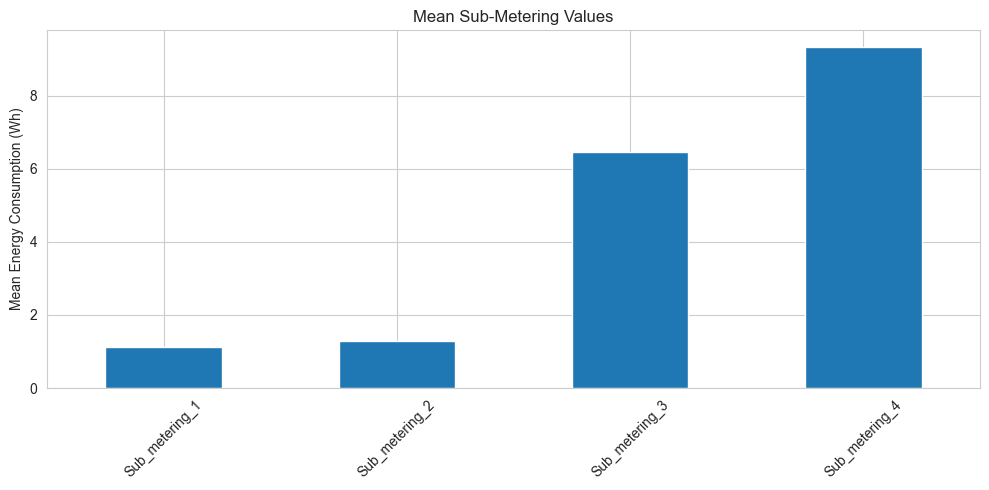

Sub_metering_1    1.121923
Sub_metering_2    1.298520
Sub_metering_3    6.458447
Sub_metering_4    9.314693
dtype: float64


In [18]:
for col in ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df_sub_metering = df[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].dropna()

# Calculate the mean of sub-metering values to understand average consumption
sub_metering_means = df_sub_metering.mean()

# Plotting the mean sub-metering values
plt.figure(figsize=(10, 5))
sub_metering_means.plot(kind='bar')
plt.title('Mean Sub-Metering Values')
plt.ylabel('Mean Energy Consumption (Wh)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Displaying the mean values for sub-metering
print(sub_metering_means)

Based on the mean sub-metering values, we can suggest the following to optimize power usage:
* Sub_metering_1 : Typically represents the kitchen, with low average consumption. Focus on maintaining efficiency rather than reduction.
* Sub_metering_2 : Associated with laundry or other rooms. Slightly higher consumption suggests room for improved energy use.
* Sub_metering_3 : Likely includes heating and air-conditioning systems, which have the highest consumption. Recommend energy-efficient solutions and smart thermostats to reduce usage.

## Insight

* The active power consumption of the house tends to increase in the summer and decrease in the winter. This may be due to the increased use of electrical appliances that require active power, such as air conditioners and electric motors, in the summer and a decrease in the use of these electrical appliances in the winter.
* Based on the provided data, it can be concluded that the reactive power consumption of the house tends to fluctuate from year to year. Reactive power consumption tends to increase in the summer and decrease in the winter.
* The most common hours for peak power usage are 8:00 PM, 9:00 PM, and 7:00 PM. This information can be utilized to recommend shifting non-essential operations to off-peak hours to optimize power usage. Additionally, it may be beneficial to implement energy-efficient equipment and renewable energy sources to reduce dependence on the grid during these peak hours.

## Reccomendation

* Conducting an energy audit to understand energy usage in the house. 
* Replacing old and inefficient electrical appliances with new and efficient ones. Old and inefficient electrical appliances typically consume more energy than new and efficient ones.
* Implementing energy-saving practices, such as turning off lights when not in use, turning off the AC when there's no one at home, and washing clothes with cold water. 
* Utilizing renewable energy, such as solar panels. Renewable energy can reduce dependence on conventional electrical energy.
* Improving the efficiency of electrical equipment that requires reactive power, such as AC and electric motors, by performing routine maintenance on these electrical appliances, such as regularly cleaning AC filters.
* Using energy-efficient appliances.